In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import anndata as ad
import pandas as pd
import numpy as np


In [6]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 600

In [2]:
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/annotated_data/TDR118_processed_RNA.h5ad")
adata

AnnData object with n_obs × n_vars = 13022 × 32057
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_SCT', 'nFeature_SCT', 'predicted.id', 'prediction.score.Lateral_Mesoderm', 'prediction.score.Neural_Crest', 'prediction.score.Somites', 'prediction.score.Epidermal', 'prediction.score.Neural_Anterior', 'prediction.score.Neural_Posterior', 'prediction.score.Endoderm', 'prediction.score.PSM', 'prediction.score.Differentiating_Neurons', 'prediction.score.Adaxial_Cells', 'prediction.score.NMPs', 'prediction.score.Notochord', 'prediction.score.Muscle', 'prediction.score.unassigned', 'prediction.score.max', 'prediction.score.LateralPlate_cxcl12a.hand2', 'prediction.score.Macrophages_rhogb.spi1b', 'prediction.score.NeuralCrest_ednrab.slc1a3a', 'prediction.score.Somites_msgn1', 'prediction.score.Periderme_foxi3a', 'prediction.score.OpticCup_rx1', 'prediction.score.Midbrai

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


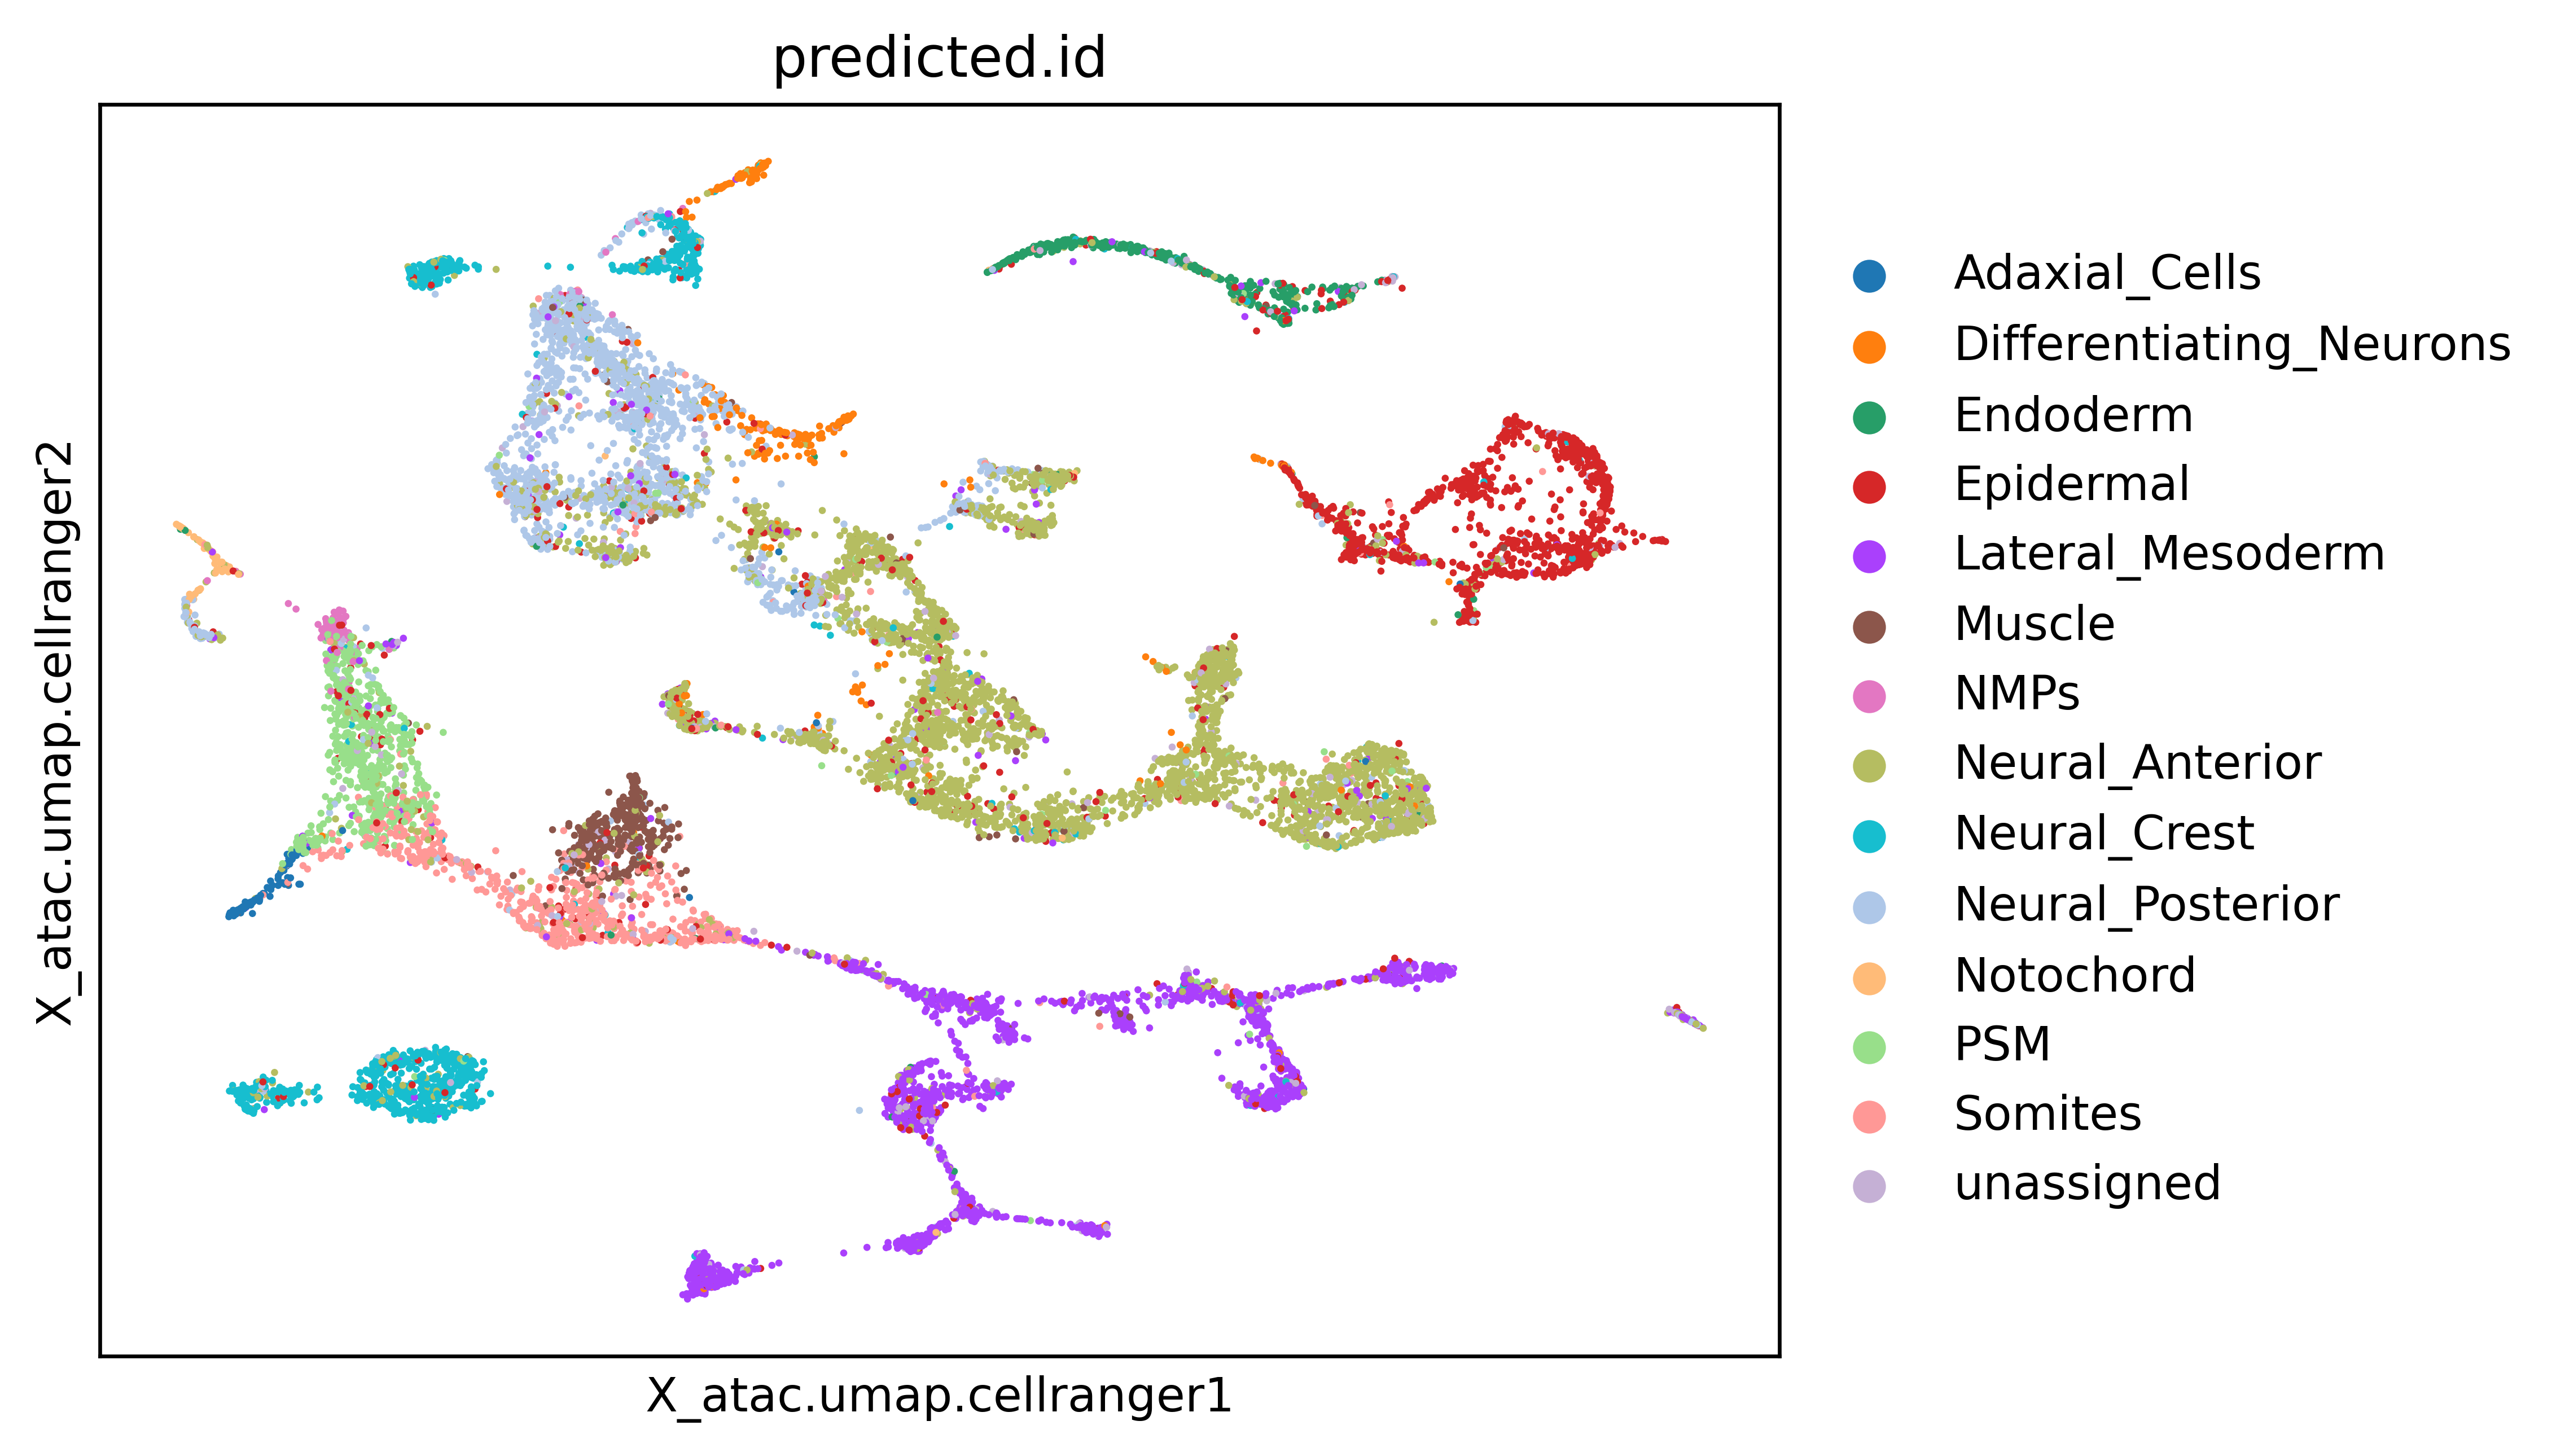

In [9]:
sc.pl.embedding(adata, 
                basis = "X_atac.umap.cellranger",
                color="predicted.id",
                save="_TDR118.pdf")

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


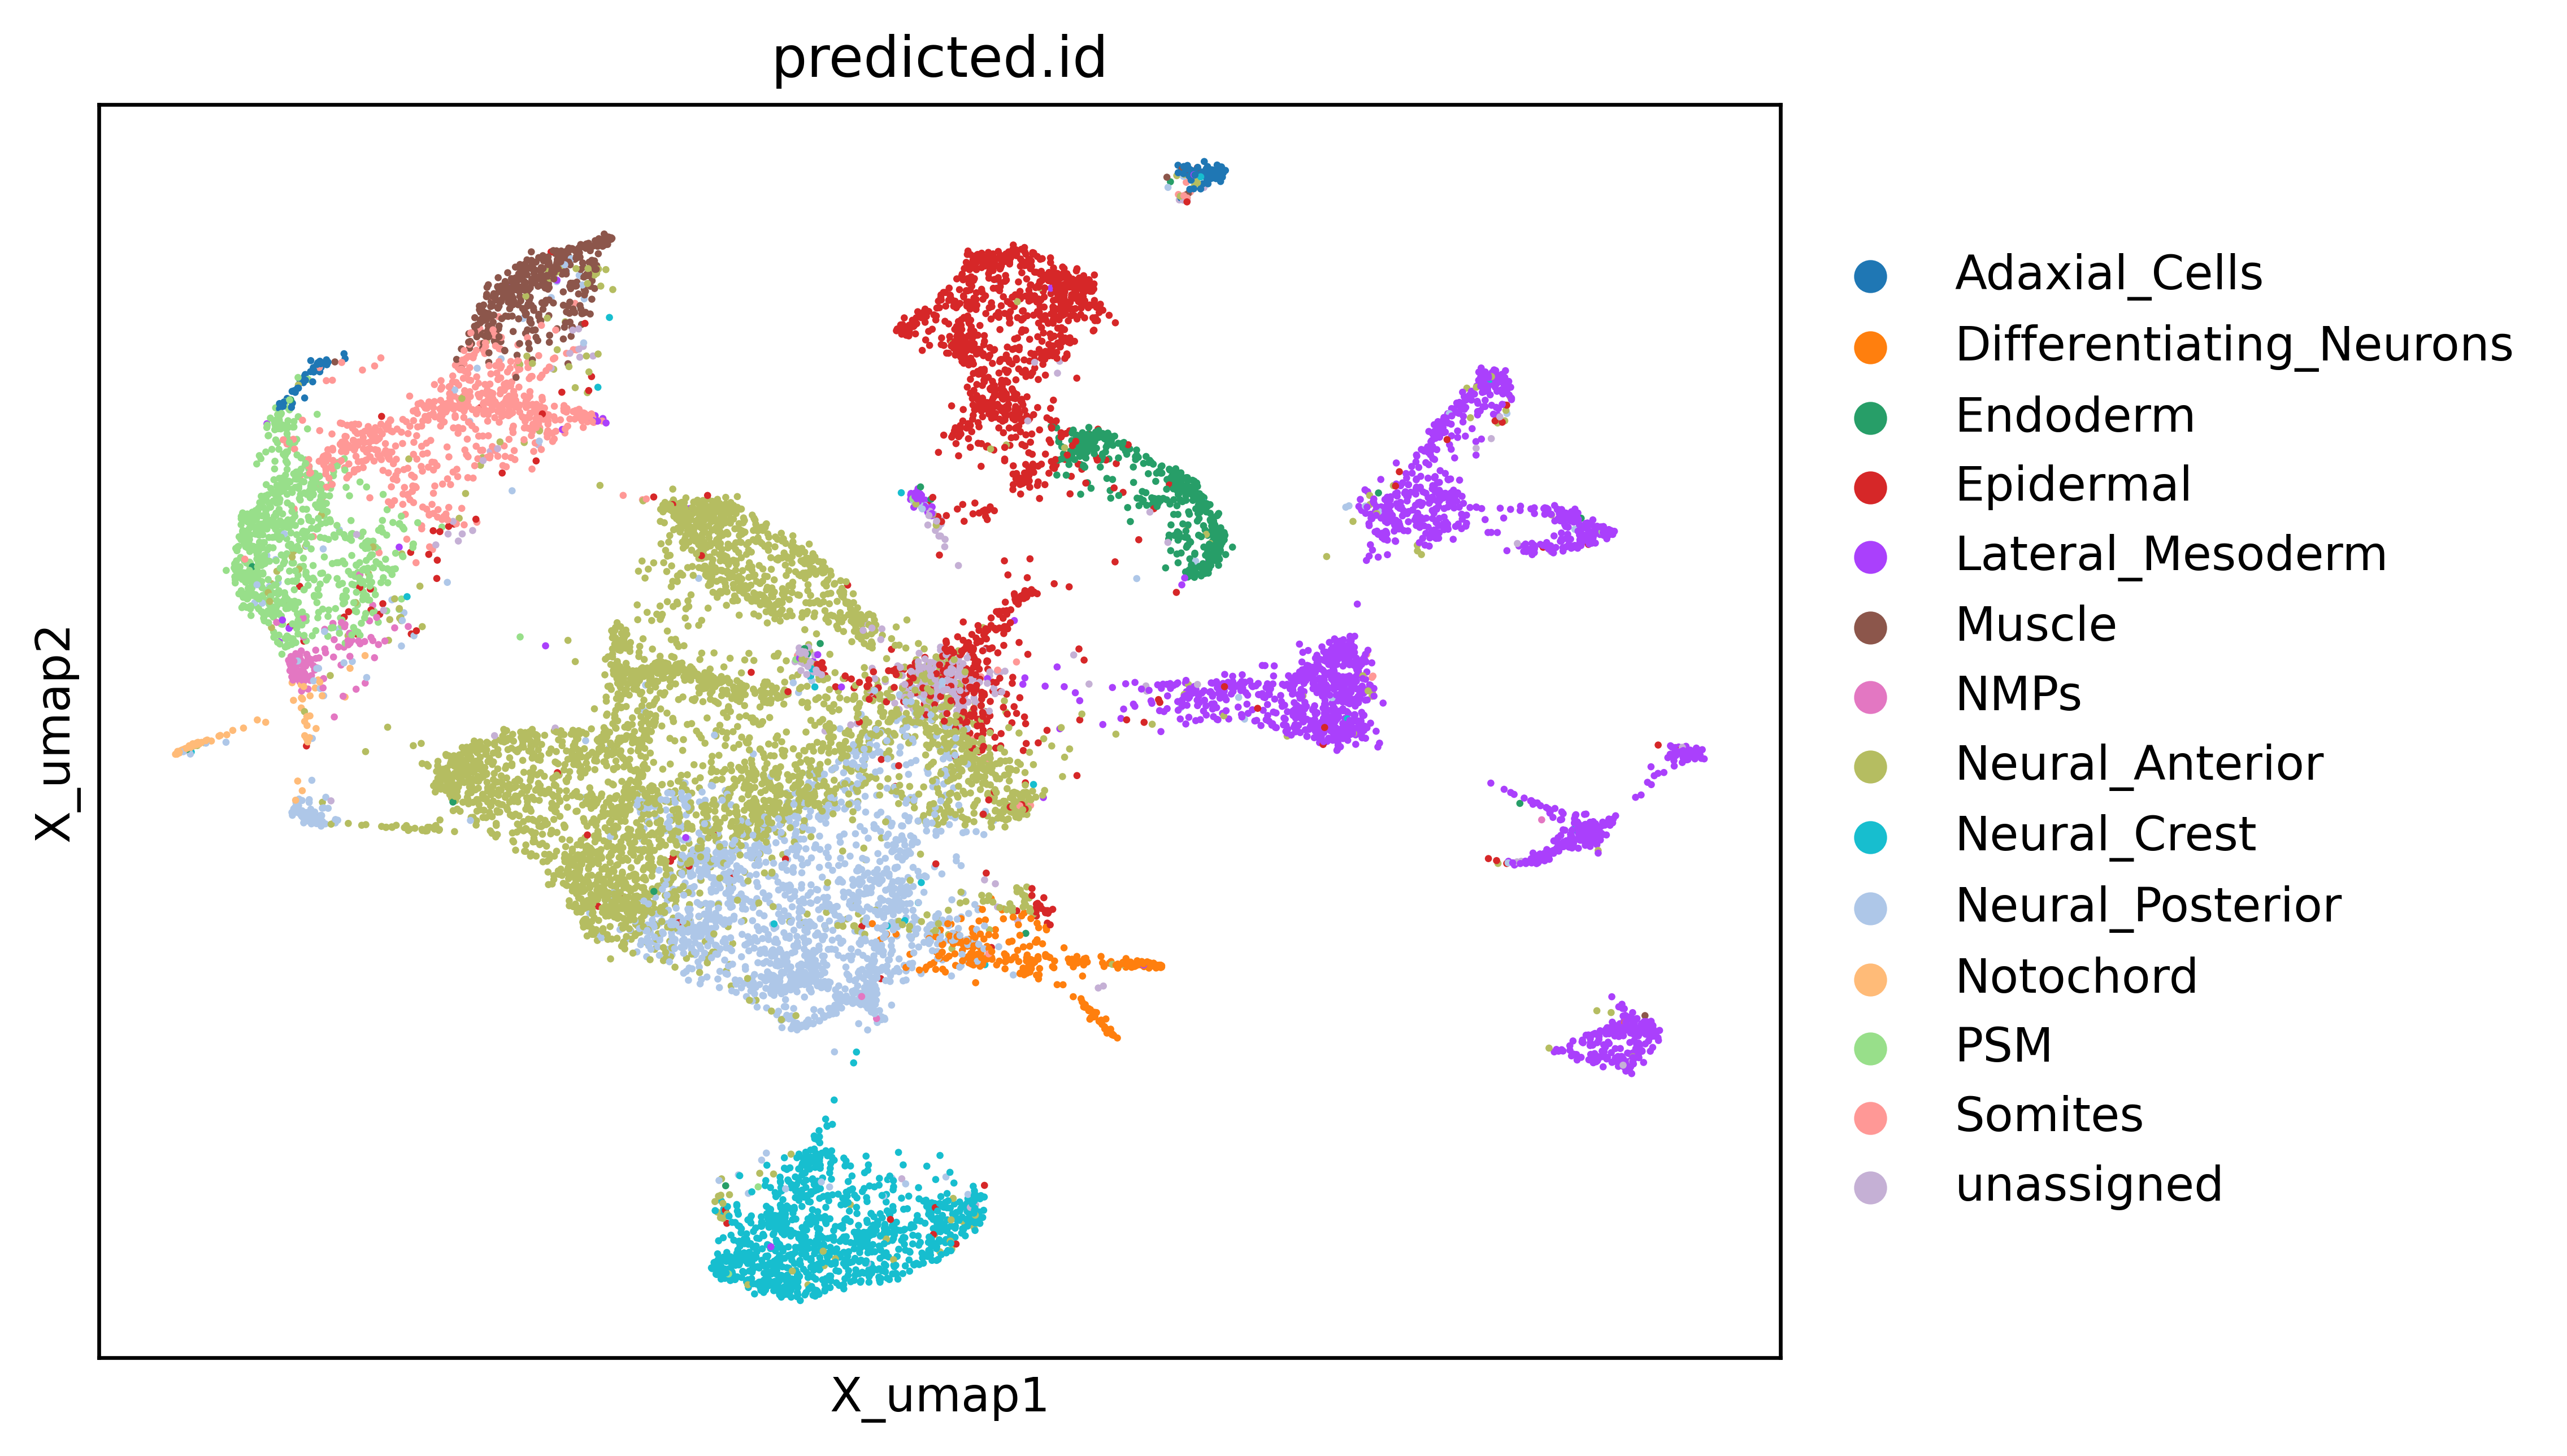

In [10]:
sc.pl.embedding(adata, 
                basis = "X_umap",
                color="predicted.id",
                save="_TDR118.pdf")

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


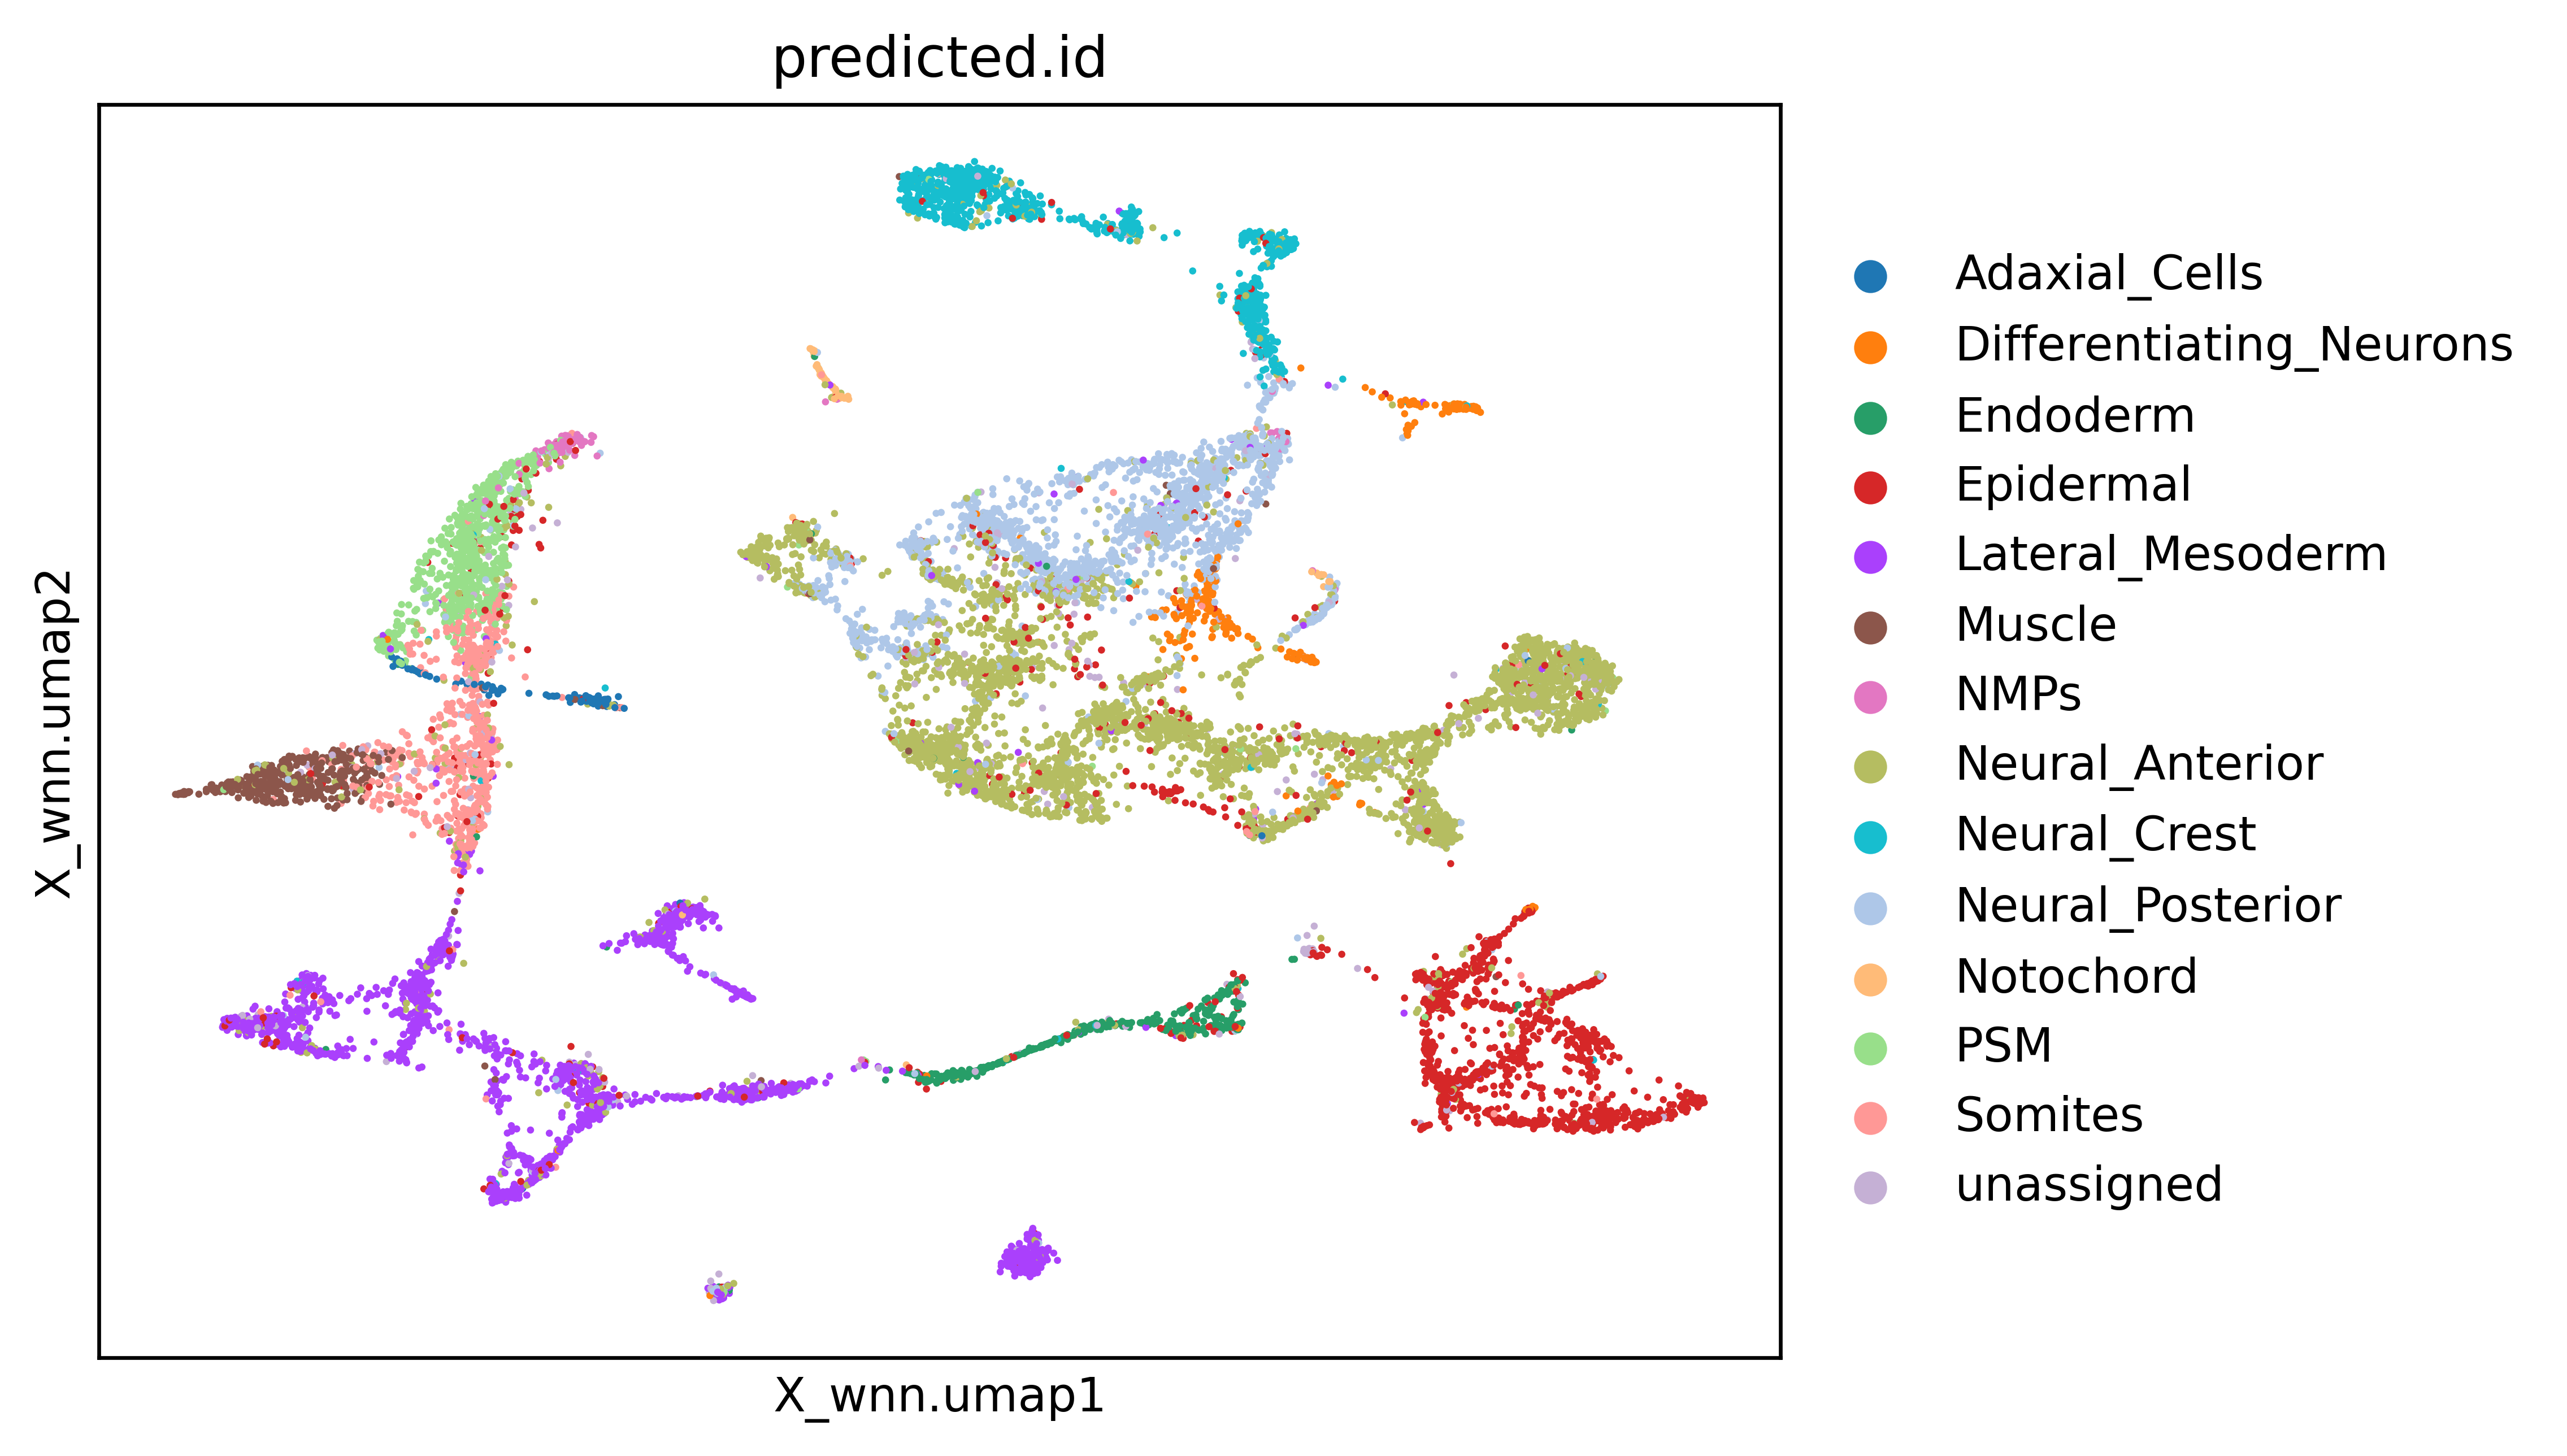

In [11]:
sc.pl.embedding(adata, 
                basis = "X_wnn.umap",
                color="predicted.id",
                save="_TDR118.pdf")

In [2]:
# Load the ATAC dataset (for preprocessing for scBasset)
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_RNA_ATAC_counts_peaks_integrated.h5ad")
adata

AnnData object with n_obs × n_vars = 95196 × 640834
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'prediction.score.Lateral_Mesoderm', 'prediction.score.Neural_Crest', 'prediction.score.Somites', 'prediction.score.Epidermal', 'prediction.score.Neural_Anterior', 'prediction.score.Neural_Posterior', 'prediction.score.Endoderm', 'prediction.score.PSM', 'prediction.score.Differentiating_Neurons', 'prediction.score.Adaxial_Cells', 'prediction.score.NMPs', 'prediction.score.Notochord', 'prediction.score.Muscle', 'prediction.score.unassigned', 'prediction.score.max', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT.weight', 'peaks_merged.weight', 'nCount_Gene.Activity', 'nFeature_Gene.Activity', 'nCount_peaks_integrated', 'nF

In [3]:
adata.var.head()

count  percentile
1-32-526       517.0    0.285283
1-2372-3057   1585.0    0.701246
1-3427-4032   3556.0    0.857617
1-4469-7268  30577.0    0.983127
1-9541-9969   6469.0    0.916087

In [9]:
adata.var["chr"] = adata.var_names.str.split("-").str[0]
adata.var["start"] = adata.var_names.str.split("-").str[1]
adata.var["end"] = adata.var_names.str.split("-").str[2]

In [10]:
adata.var.head()

count  percentile chr start   end
1-32-526       517.0    0.285283   1    32   526
1-2372-3057   1585.0    0.701246   1  2372  3057
1-3427-4032   3556.0    0.857617   1  3427  4032
1-4469-7268  30577.0    0.983127   1  4469  7268
1-9541-9969   6469.0    0.916087   1  9541  9969

In [11]:
adata.write_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_RNA_ATAC_counts_peaks_integrated_for_scBasset.h5ad")

In [2]:
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_RNA_ATAC_counts_RNA_master_filtered.h5ad")
adata

AnnData object with n_obs × n_vars = 94562 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'nCount_peaks_integrated', 'nFeature_peaks_integrated', 'dataset', 'integrated_weight', 'peaks_integrated_weight', 'wsnn_res_0_8', 'seurat_clusters', 'data_source', 'annotation_ML', 'scANVI_zscape', 'annotation_ML_coarse', 'dev_stage'
    var: 'features'
    uns: 'annotation_ML_coarse_colors', 'annotation_ML_colors', 'dataset_colors', 'global_annotation_colors', 'log1p', 'scANVI_zscape_colors'
    obsm: 'X_umap.atac', 'X_umap.rna', 'X_wnn.umap'
    layers: 'counts'

In [6]:
adata.obs.groupby("dataset").count()

/tmp/ipykernel_1261620/3957352496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby("dataset").count()


orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  nFeature_ATAC  \
dataset                                                                     
TDR118        13568       13568         13568        13568          13568   
TDR119        12413       12413         12413        12413          12413   
TDR124         6528        6528          6528         6528           6528   
TDR125        17130       17130         17130        17130          17130   
TDR126        14970       14970         14970        14970          14970   
TDR127        18963       18963         18963        18963          18963   
TDR128        10990       10990         10990        10990          10990   

         nucleosome_signal  nucleosome_percentile  TSS_enrichment  \
dataset                                                             
TDR118               13568                  13568           13568   
TDR119               12413                  12413           12413   
TDR124                6528                   6528            6528   
TDR125               17130                  17130           17130   
TDR126               14970                  14970           14970   
TDR127               18963                  18963           18963   
TDR128               10990                  10990           10990   

         TSS_percentile  nCount_SCT  ...  nFeature_peaks_integrated  \
dataset                              ...                              
TDR118            13568       13568  ...                      13568   
TDR119            12413       12413  ...                      12413   
TDR124             6528        6528  ...                       6528   
TDR125            17130       17130  ...                      17130   
TDR126            14970       14970  ...                      14970   
TDR127            18963       18963  ...                      18963   
TDR128            10990       10990  ...                      10990   

         integrated_weight  peaks_integrated_weight  wsnn_res_0_8  \
dataset                                                             
TDR118               13568                    13568         13568   
TDR119               12413                    12413         12413   
TDR124                6528                     6528          6528   
TDR125               17130                    17130         17130   
TDR126               14970                    14970         14970   
TDR127               18963                    18963         18963   
TDR128               10990                    10990         10990   

         seurat_clusters  data_source  annotation_ML  scANVI_zscape  \
dataset                                                               
TDR118             13568        13568          13568          13568   
TDR119             12413        12413          12413          12413   
TDR124              6528         6528           6528           6528   
TDR125             17130        17130          17130          17130   
TDR126             14970        14970          14970          14970   
TDR127             18963        18963          18963          18963   
TDR128             10990        10990          10990          10990   

         annotation_ML_coarse  dev_stage  
dataset                                   
TDR118                  13568      13568  
TDR119                  12413      12413  
TDR124                   6528       6528  
TDR125                  17130      17130  
TDR126                  14970      14970  
TDR127                  18963      18963  
TDR128                  10990      10990  

[7 rows x 33 columns]